In [125]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
irisFile = open("Iris.csv","r")
df = pd.read_csv(irisFile)
species = sorted(list(set(df["Species"])))
print(species)


In [61]:
df["Species"] = df["Species"].apply(lambda s : species.index(s))

In [82]:
baseDf = df[df["Species"] != 2]
extraDf = df[df["Species"] == 2]

baseX, baseY = baseDf.iloc[:,1:-1], baseDf.iloc[:,-1]
extraX, extraY = extraDf.iloc[:,1:-1], extraDf.iloc[:,-1]

In [83]:
baseDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [79]:
extraDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,2
101,102,5.8,2.7,5.1,1.9,2
102,103,7.1,3.0,5.9,2.1,2
103,104,6.3,2.9,5.6,1.8,2
104,105,6.5,3.0,5.8,2.2,2
105,106,7.6,3.0,6.6,2.1,2
106,107,4.9,2.5,4.5,1.7,2
107,108,7.3,2.9,6.3,1.8,2
108,109,6.7,2.5,5.8,1.8,2
109,110,7.2,3.6,6.1,2.5,2


In [84]:
baseXTrain, baseXTest, baseYTrain, baseYTest = train_test_split(baseX, baseY, train_size=0.8)
extraXTrain, extraXTest, extraYTrain, extraYTest = train_test_split(extraX, extraY, train_size=0.8)

In [140]:
baseXTensor = torch.tensor(np.array(baseXTrain.values), dtype=torch.float32)
baseYTensor = torch.tensor(np.array(baseYTrain.values), dtype=torch.long)

baseXTensorTest = torch.tensor(np.array(baseXTest.values), dtype=torch.float32)
baseYTensorTest = torch.tensor(np.array(baseYTest.values), dtype=torch.long)

extraXTensor = torch.tensor(np.array(extraXTrain.values), dtype=torch.float32)
extraYTensor = torch.tensor(np.array(extraYTrain.values), dtype=torch.long)

extraXTensorTest = torch.tensor(np.array(extraXTest.values), dtype=torch.float32)
extraYTensorTest = torch.tensor(np.array(extraYTest.values), dtype=torch.long)


In [141]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 64)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(64, 16) # 64 neurons to 16 neurons
        self.drop = nn.Dropout(0.2) # Dropout for regularization
        self.act2 = nn.ReLU()       # Another ReLU
        self.l3 = nn.Linear(16, 3)  # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

In [155]:
def fit(model,xTensor,yTensor):
    epochs = 400
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        ypred = model(xTensor)
        loss = loss_fn(ypred, yTensor)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

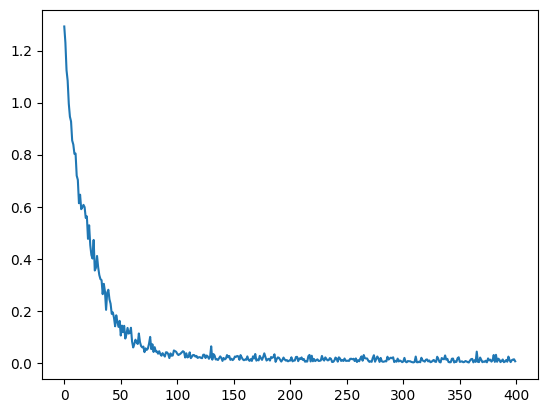

In [157]:
model = FullyConnected()
fit(model,baseXTensor,baseYTensor)

In [158]:
baseYPred = model(baseXTensorTest)

In [159]:
baseYPred = torch.argmax(baseYPred,dim = 1)


In [160]:
print("Accuracy:", accuracy_score(baseYPred.cpu(), baseYTensorTest))
print("Confusion Matrix:\n", confusion_matrix(baseYPred.cpu(), baseYTensorTest))

Accuracy: 1.0
Confusion Matrix:
 [[11  0]
 [ 0  9]]


In [161]:
torch.save(model,"model")

In [162]:
newModel = FullyConnected()
newModel = torch.load("model",weights_only=False)

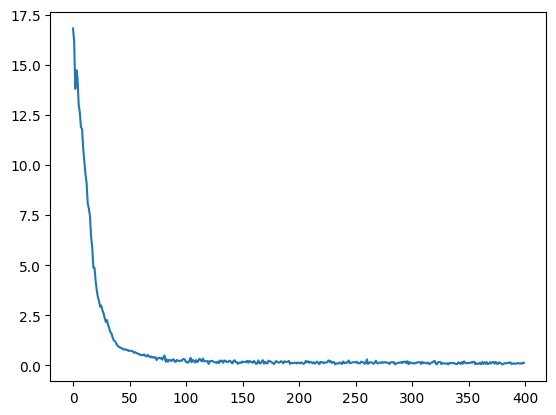

In [163]:
fit(newModel,extraXTensor,extraYTensor)

In [167]:
extraYPred = newModel(baseXTensorTest)

In [168]:
extraYPred = torch.argmax(extraYPred,dim = 1)

In [169]:
extraYPred

tensor([2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0])